## Calculation of exponent function using Maclaurin Series for x = 1
\begin{align}
e^x = \sum\limits_{n=0}^{\infty}\frac{x^n}{n!}
\end{align}

In [6]:
# importing dependency functions
from math import exp as ideal_exp
from matplotlib import pyplot as plt


# initial guess for iteration number
iter_num = 25

# implementation of factorial function
def custom_factorial(n):
#     base case to stop recursion
    if n < 1: return 1    
#     general case to compute factorial
    return n * custom_factorial(n-1)

# implementation of power function
def custom_power(base, degree):
#     base case to stop recursion
    if degree < 1: return 1
#     general case to compute power
    return base * custom_power(base, degree - 1)

# recursive implementation of exponential function
def custom_exp_recursive(x, counter=0, limit = iter_num):
#     base case to stop recursion
    if counter == limit - 1: return custom_power(x, counter)/custom_factorial(counter)
#     general case to compute exponent
    return custom_power(x, counter) / custom_factorial(counter) + custom_exp_recursive(x, counter + 1, limit)

# loop implementation of exponential function to analyze error function
def custom_exp_analysis(x, iter_num=iter_num):
#     computing math library exponent as reference
    ideal = ideal_exp(x)
#     initialization of final result and error vector
    result = 0
    error_vec = [ideal]
#     Maclaurin iteration loop
    for i in range(iter_num):
        result += custom_power(x, i)/custom_factorial(i)
        error_vec.append((ideal - result) / ideal)
    return result, error_vec

print("Calculated exponent value is {} using {} iterations of Maclaurin series".format(custom_exp_recursive(1), iter_num))

Calculated exponent value is 2.718281828459045 using 25 iterations of Maclaurin series


## True relative error analysis.

After each iteration term is added, the relative error is computed and plotted 

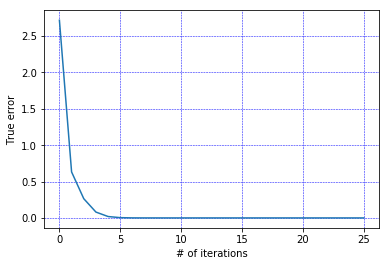

In [13]:
# plotting true error function
plt.plot(custom_exp_analysis(1)[1])
plt.ylabel('True error')
plt.xlabel('# of iterations')
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

## Precision test

Suppose that $10^-15$ is a principal precision for custom exponent function. How many Maclaurin terms is needed in order to reach the given precision?

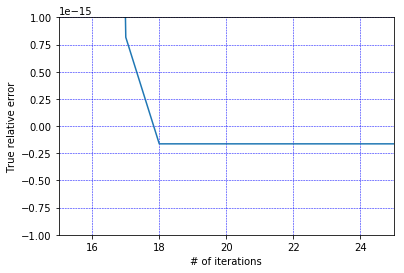

In [11]:
# zoom plotting to explore precision
plt.plot(custom_exp_analysis(1)[1])
plt.ylabel('True relative error')
plt.xlabel('# of iterations')
plt.xlim(15, 25)
plt.ylim(-1e-15, 1e-15)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

From above plot it is clearly seen that 17 iterations are enough to reach e-15 precision, since error function fits into e-15 precision boundaries.

## Truncation error test

After 19th iteration, result is not improving anymore. Why?

Increasing number of iterations has no any effect to error function anymore. To understand causes let's analyze 19th cycle process. 19th Maclaurin element is calculated as 1/19! and added to global result. Let's see what we get by dividing 1 to 19!.

In [78]:
from decimal import Decimal
print(Decimal(1/custom_factorial(19)))

8.2206352466243294955370400408296422011147285715637438030523043153152684681117534637451171875E-18


It is not 0, so cause is not from this term. 

In [66]:
small_term = 1/custom_factorial(19)
added_something = 0.99 + small_term
print(Decimal(added_something))

0.9899999999999999911182158029987476766109466552734375


Something strange happens when we add 0.99 to 19th Maclauring series. Resulting value becomes less than 0.99.

In [79]:
added_something = 2599999999999999990000.999999 + small_term
print(Decimal(added_something))

2600000000000000000000


Even 10000 difference is rounded here to obtain number without fractions.

In [81]:
print(type(small_term))

<class 'float'>


In Python there is 53 bits of precision available for floating numbers. 

### Precision tests using x = 2 and x = 10

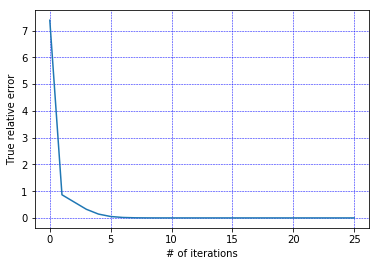

In [15]:
# plotting true error function
plt.plot(custom_exp_analysis(2)[1])
plt.ylabel('True relative error')
plt.xlabel('# of iterations')
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

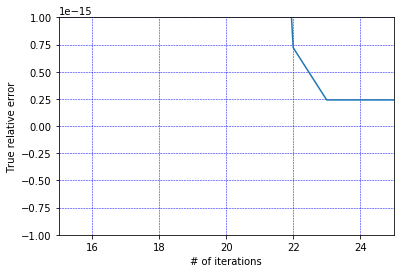

In [20]:
# zoom plotting to explore precision
plt.plot(custom_exp_analysis(2, iter_num=25)[1])
plt.ylabel('True relative error')
plt.xlabel('# of iterations')
plt.xlim(15, 25)
plt.ylim(-1e-15, 1e-15)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

This time, we could reach e-15 accuracy in 22 iterations.

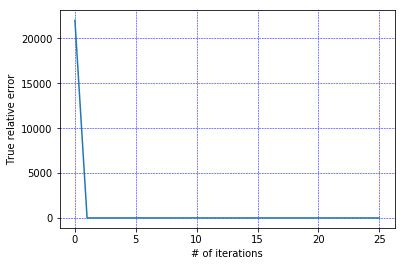

In [21]:
# plotting true error function
plt.plot(custom_exp_analysis(10)[1])
plt.ylabel('True relative error')
plt.xlabel('# of iterations')
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

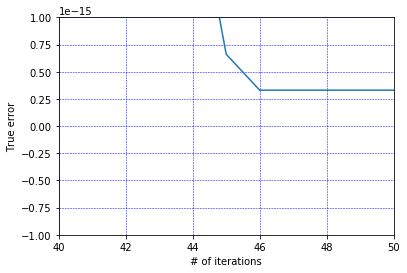

In [24]:
# zoom plotting to explore precision
plt.plot(custom_exp_analysis(10, iter_num=50)[1])
plt.ylabel('True error')
plt.xlabel('# of iterations')
plt.xlim(40, 50)
plt.ylim(-1e-15, 1e-15)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

In the case when x = 10, error function converged to e-15 precision at 45th Maclaurin iteration. 

### Conclusion about approximations

Most decimal fractions cannot be represented exactly as binary fractions. Therefore, in general, the decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. For instance 1/3 fraction will be stored in bits in following way 0.0001100110011001100110011001100110011001100110011... and it consumes all bits allocated for current variable. To save space, Python stops its binary iterations at some step to approximate value and save bits. This may be a reason of such strange behaviour of floating number operations and early approximations.